# EDA of Spike sorted with kilosort and manually clustered with phy2

Dataset:
**JG14_190621**

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scipy.stats as st

from spikes_class import SpikeAnalysis

#%matplotlib inline  
%matplotlib notebook
%matplotlib qt

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

## 0 Data Wrangling

Loading necessary files

folder = 'C:\Users\Nutzer\Google Drive\1 Uni\1.3 Uni Projekte\Masterarbeit Laborarbeit Neuroscience\Data   
Analysis\JG14_190621\electrophysiology'; 
spike_times.npy  
spike_clusters.npy  
cluster_group.tsv  
cluster_info.tsv  


In [102]:
# Linux

folder = "/home/max/ExpanDrive/Google Drive/3 Projekte/Masterarbeit Laborarbeit Neuroscience/1 Data Analysis/JG14_190621"
spikes = SpikeAnalysis(folder)

In [ ]:
# Windows



### Kilosort spike sortings

#### Linux

In [63]:
#specify wher the dataset folder is
#folder = r"C:\Users\User\Google Drive\3 Projekte\Masterarbeit Laborarbeit Neuroscience\1 Data Analysis\JG14_190621"
folder = "/home/max/ExpanDrive/Google Drive/3 Projekte/Masterarbeit Laborarbeit Neuroscience/1 Data Analysis/JG14_190621"

# import spike times from kilosort (in 20k per second sampling rate)
spike_times = np.load(folder+r"/electrophysiology/spike_times.npy")
spike_cluster = np.load(folder+r"/electrophysiology/spike_clusters.npy")

# create spike Data Frame with clusters and spike times
spike_df = pd.DataFrame( { 'cluster':spike_cluster, 'spike_times': spike_times[:,0] } )

spike_df

,cluster,spike_times
0,182,147
1,51,215
2,54,218
3,99,257
4,120,287
...,...,...
622358,106,22702646
622359,82,22702655
622360,94,22702670
622361,51,22702697


In [64]:
# import information about clusters from kilosort and phy2
cluster_df = pd.read_csv(folder+r"/electrophysiology/cluster_info.tsv", sep='\t')
cluster_df = cluster_df.rename(columns={'id':'cluster_id'})
cluster_df = cluster_df.set_index('cluster_id')

In [65]:
# import complete info preprocessed by matlab script #ToDo: move matlab to python script
excel_df = pd.read_excel(folder+"/output_file.xlsx", 'Daten', header=[0, 1] )


#### Windows

In [98]:
#specify wher the dataset folder is
#folder = r"C:\Users\User\Google Drive\3 Projekte\Masterarbeit Laborarbeit Neuroscience\1 Data Analysis\JG14_190621"
folder = r"C:\Users\User\Google Drive\3 Projekte\Masterarbeit Laborarbeit Neuroscience\1 Data Analysis\JG14_190621"

# import spike times from kilosort (in 20k per second sampling rate)
spike_times = np.load(folder+r"\electrophysiology\spike_times.npy")
spike_cluster = np.load(folder+r"\electrophysiology\spike_clusters.npy")

# create spike Data Frame with clusters and spike times
spike_df = pd.DataFrame( { 'cluster':spike_cluster, 'spike_times': spike_times[:,0] } )

spike_df

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Google Drive\\3 Projekte\\Masterarbeit Laborarbeit Neuroscience\\1 Data Analysis\\JG14_190621\\electrophysiology\\spike_times.npy'

In [3]:
# import information about clusters from kilosort and phy2
cluster_df = pd.read_csv(folder+r"\electrophysiology\cluster_info.tsv", sep='\t')
cluster_df = cluster_df.rename(columns={'id':'cluster_id'})
cluster_df = cluster_df.set_index('cluster_id')

cluster_df

,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh
cluster_id,,,,,,,,,,
0,831.6,12.7,mua,37.007576,11,0.0,1.629761,good,1850,0
1,488.2,24.7,mua,33.353313,11,0.0,5.098068,good,5787,0
2,769.5,42.0,mua,40.792339,56,23.0,5.613424,mua,6372,0
3,1006.6,2.1,good,37.173256,10,46.0,2.375046,good,2696,0
4,578.3,29.5,mua,38.314754,10,46.0,4.088497,good,4641,0
...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,27.336491,12,322.0,1.457094,mua,1654,0
204,NaN,NaN,NaN,31.791813,76,207.0,5.696234,good,6466,0
206,341.1,0.0,good,28.028379,1,299.0,2.153927,mua,2445,0


In [4]:
# import complete info preprocessed by matlab script #ToDo: move matlab to python script
excel_df = pd.read_excel(folder+r"\output_file.xlsx", 'Daten', header=[0, 1] )


---

### Trials and Behavior info
from phenosys necoded in ttl
- all times are in sampling rate (20k per Second)
- Infromation about what was encoded from phenosys (behavior) to intern recording [coding of ttl signal phenosys](https://www.notion.so/4b534b46cb5f4611b31b6b0ac0b1712b)

In [66]:
spike_df

,cluster,spike_times
0,182,147
1,51,215
2,54,218
3,99,257
4,120,287
...,...,...
622358,106,22702646
622359,82,22702655
622360,94,22702670
622361,51,22702697


In [67]:
# create cleaned up data frame with each trial in one row and times and behavior
trials_df = excel_df.loc[:]['TTL']

# set trials ans index and name as trials
trials_df = trials_df.set_index('trial-num')
trials_df.index.name = 'trial'


# rename colums to aprop names
trials_df = trials_df.rename(columns={'reward':'event','time 1':'start', 'time 2':'cue', 'time 3':'sound','time 4':'openl','time reward':'reward','time inter trial in.':'iti','time inter trial end':'end', 'time dif trial':'length_ms', 'ttl start rel':'rel'})

# drop all unnecessary colums
trials_df = trials_df.drop(['dif ttl - excel', 'diff round', 'excel start rel', 'start rel dif', 'TIstarts','IND-CUE_pres_start','SOUND_start', 'resp-time-window_start', 'ITIstarts','ITIends', 'time dif trial round', 'rel'], axis = 1 )

# drop al rows with only 0
trials_df = trials_df.drop(trials_df[trials_df['start']==0].index, axis=0)

# convert times in ms to count 20k per second (*20)
trials_df.loc[:,'start':'end']*=20

# convert all time columns to int64
trials_df = trials_df.astype({'start': int, 'cue': int, 'sound': int, 'openl': int, 'reward': int, 'iti': int, 'end': int})

# calculate trial length in clicks
trials_df['length']=trials_df['end']-trials_df['start']


# recalculate 

trials_df

,start,cue,sound,openl,reward,iti,end,event,length_ms,length
trial,,,,,,,,,,
1,184261,204966,205627,206346,346501,346782,347017,0,8137.80,162756
2,347296,367357,367997,368675,469942,488083,508307,5,8050.55,161011
3,508590,528631,529285,529965,540668,558808,579008,5,3520.90,70418
4,579268,599314,599969,600650,613871,614030,634233,6,2748.25,54965
5,751059,771123,771761,772445,780009,783821,804022,8,2648.15,52963
...,...,...,...,...,...,...,...,...,...,...
260,21715394,21735452,21736093,21736773,21876901,21877101,21877324,0,8096.50,161930
261,21877585,21897643,21898282,21898964,22033712,22037470,22057672,7,9004.35,180087
262,22057937,22077977,22078634,22079315,22103174,22103335,22123538,6,3280.05,65601


## 1 EDA
Exploring the Dataset to find out 
1. how trials are different
2. firing behavior of cluster for different trials
3. z scored firing of cluster for all trials
4. comparison between clusters

### Trial times and differences in times

#### Prepare
- find trials start and fisnish that are oviously not representing the behavior of question (too long)

In [96]:
# histogram of trial times & normal fitted cuve
def hist_and_fit(df):
    fig, ax = plt.subplots()

    # plot histogramm
    num_bins = 50
    n, bins, patches = ax.hist(df, num_bins, density=1)
    
    # add a 'best fit' line
    mean = df.mean()
    std = df.std()
    y = st.norm.pdf(bins, df.mean(), df.std())
    ax.plot(bins, y, '-')
    ax.axvline(x=mean, color='y')
    ax.set_xlabel('Trial Length')
    ax.set_ylabel('Probability density')
    ax.set_title(f"Histogram of Trial Length $\mu=${round(mean, 2)}, $\sigma=${round(std, 4)}")

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


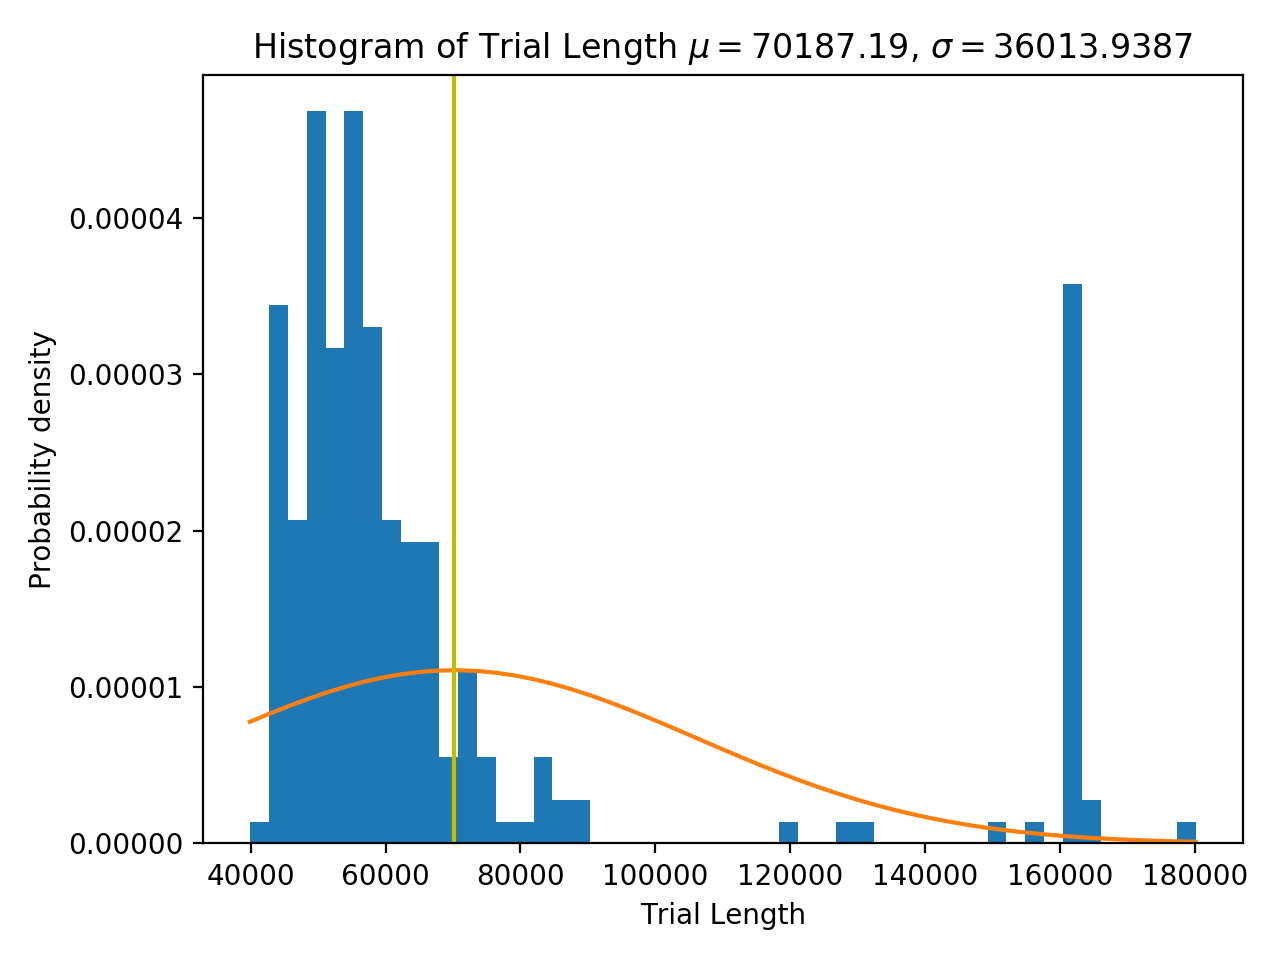

In [97]:
hist_and_fit(trials_df.loc[:,'length'])

<IPython.core.display.Javascript object>


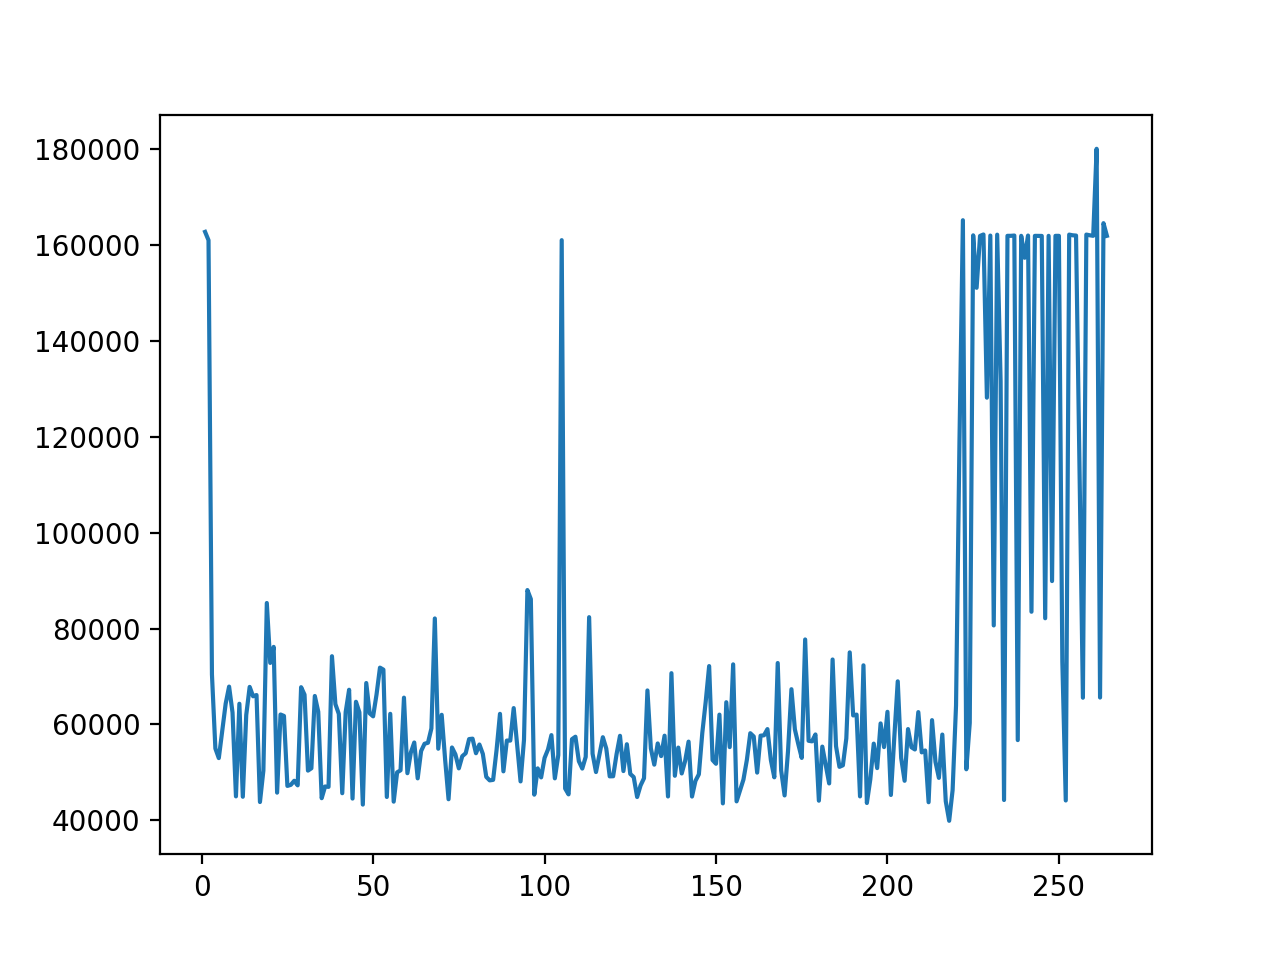

In [70]:
%matplotlib notebook
%matplotlib qt

# lineplot of trials trials conesquitively and length
fig, ax = plt.subplots()
ax.plot(trials_df.loc[:,'length'])
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 20))
plt.show()

In [71]:
# remove trials which are longer than avera+/- 2 sigma
# use interactive plot & zooming to determin too long trials in beginning and end
# start at 5
# end at 219
ar = np.full((trials_df.shape[0] ,1),True, dtype='bool')
ar[0:6,0] = False
ar[215:,0] = False

trials_df['select'] = ar

trials_df.head(10)

,start,cue,sound,openl,reward,...,end,event,length_ms,length,select
trial,,,,,,,,,,,
1,184261,204966,205627,206346,346501,...,347017,0,8137.80,162756,False
2,347296,367357,367997,368675,469942,...,508307,5,8050.55,161011,False
3,508590,528631,529285,529965,540668,...,579008,5,3520.90,70418,False
4,579268,599314,599969,600650,613871,...,634233,6,2748.25,54965,False
5,751059,771123,771761,772445,780009,...,804022,8,2648.15,52963,False
6,804302,824363,825003,825685,838970,...,862946,8,2932.20,58644,False
7,863207,883328,883968,884667,889192,...,927529,6,3216.10,64322,True
8,927792,947831,948491,949172,957333,...,995674,6,3394.10,67882,True
9,995938,1015977,1016615,1017298,1020095,...,1058417,5,3123.95,62479,True


#### Trial Length

<IPython.core.display.Javascript object>


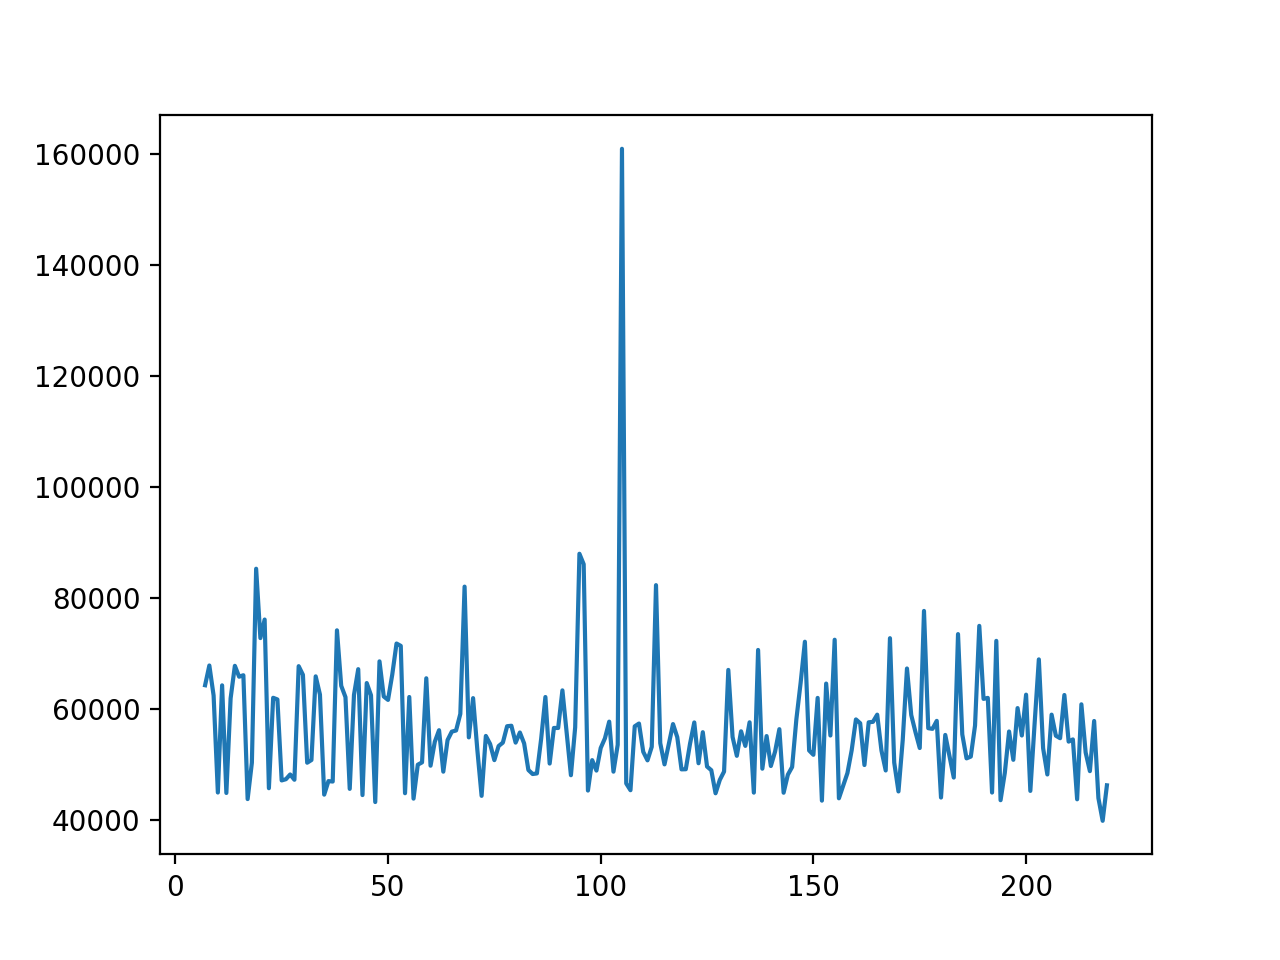

In [72]:
# lineplot of trials trials conesquitively and length only taking selected one into account
fig, ax = plt.subplots()
ax.plot(trials_df.loc[trials_df.loc[:,'select'],'length'])
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 20))
plt.show()

<IPython.core.display.Javascript object>


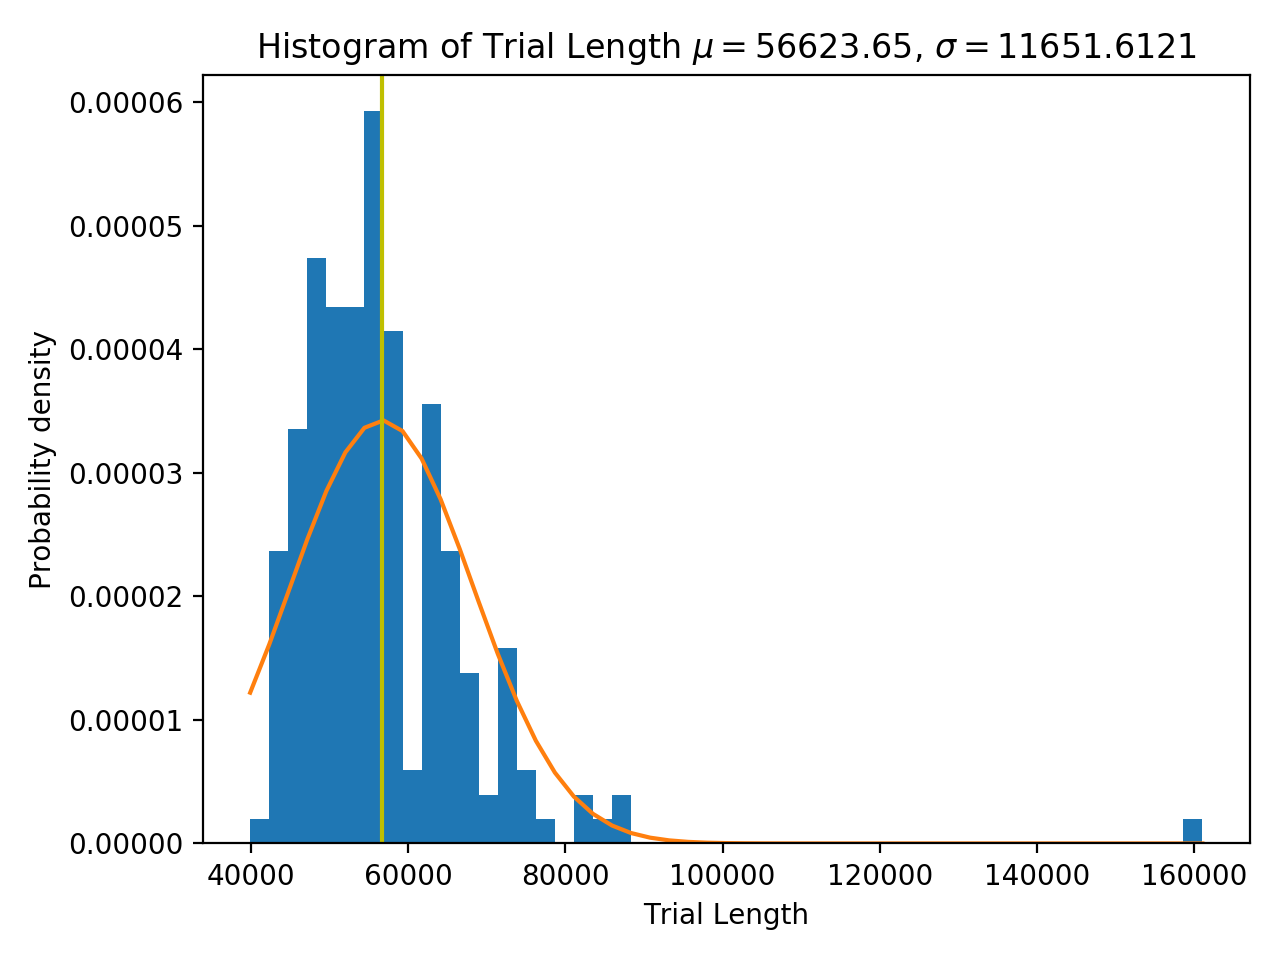

In [73]:
hist_and_fit(trials_df.loc[trials_df.loc[:,'select'],'length'])

### Plot Spike Trains for single 

#### helper functions

In [74]:
def get_spikes_for_trial(array, start, stop):
    '''
    params: array = numpy array (N,1) with values to check against
            start, stop = value to find all values in array between
    return: valus in array between start and stop
    '''
    ar = array[np.logical_and(array >= start, array <= stop)].values
    if ar.size > 0:
        ar = ar[:] - ar[0]
    return ar

In [75]:
def get_spikes_for_cluster(trials_df, cluster):
    '''
    params: trials_df = array with all trials, start and stop times
            sikes_times = df with all the spike times indext by cluster
            cluster = integer of cluster
    return: DataFrame with all spikes 
    '''
    df = pd.DataFrame(index=[0])
    for row in trials_df.index[trials_df['select'] == True]:
        # create empty data frame indext by trials, but only one which have select = true
        start = trials_df.loc[row, 'start']
        stop = trials_df.loc[row, 'end']
        df1 = pd.DataFrame({row:get_spikes_for_trial(cluster, start, stop)}, dtype="Int64")
        df = pd.concat([df,df1.dropna()], axis=1)
    df = df.T
    df.index.name = 'Trial'
    return df

In [76]:
def plt_spike_train(cluster, trials_df):
    """
    def: plots the spike trins fro each trial stacked on top of each other
    params: cluster = 
    """
    # initialize plot
    fig, ax = plt.subplots()

    # get spikes for each trial for this cluster
    for row in trials_df.index[trials_df['select'] == True]:
        ypos = [row, row+0.8]
        start = trials_df.loc[row, 'start']
        stop = trials_df.loc[row, 'end']
        for col in get_spikes_for_trial(cluster, start, stop):
            ax.plot([col, col], ypos)

    ax.set_title('Spikes for Cluster 1')
    ax.set_xlabel('Sampling Points [20kHz]')
    ax.set_ylabel('Trial')
    plt.yticks(trials_df.index[trials_df['select'] == True][0::10])

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    return plt.show()

In [77]:
def plt_spike_train_event(cluster, event, window, save=False, path=None):
    """
    def: plot the spike train around event (0) for all trials stacked on each other for event +/- delta
    params: cluster= integer::cluster (aka Neuron) to plot spikes for
            event= string::event in question (must be in trials_df as column name)
            window = integer::half window width in seconds
    return: plot
    """
    cluster_df = spike_df[spike_df.loc[:]['cluster'] == cluster]['spike_times']
    trials = trials_df.loc[trials_df['select'] == True][event]
    delta = window*20000

    # initialize figure
    fig, ax = plt.subplots()

    # loop that iterats trough all indeces in trial df
    for row in trials.index:
        # define length of spike for row
        ypos = [row, row+1]
        # derive spike times in range delta around event time for trial 
        ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
        ar = ar.astype('int64')
        ar = ar - trials[row] 
        # plot spikes
        for col in ar:
            ax.plot([col, col], ypos, 'k-', linewidth=0.8)
    # plot h line at 0 (where event happens)
    ax.plot([0,0], [trials.index.min(), trials.index.max()], 'r-', label=event, linewidth=0.2 )
    # naming
    ax.set_title(f"Spikes for Cluster {cluster} around Event {event}")
    ax.set_xlabel('Sampling Points [20kHz]')
    ax.set_ylabel('Trial')
    # specify y tick distance
    plt.yticks(trials_df.index[trials_df['select'] == True][0::10])

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    # if save = True -> save to path
    if save:
        plt.savefig(path+r"\spike_train_event-"+event+"-"+string(cluster)+".png")
    else:
        return plt.show()

In [78]:
def plt_spike_train_hist_event(cluster, selected_trials, event, window, reward_event=None, save=False, path=None):
    """
    def: plot the spike train around event (0) for all trials stacked on each other for event +/- delta
         and the histogram for the count of spikes over all trials
    params: cluster= integer::cluster (aka Neuron) to plot spikes for
            selected_trials= DataFrame::dataframe with all the trials to plot         
            event= string::event in question (must be in trials_df as column name)
            window = integer::half window width in seconds
    return: plot
    """
    cluster_df = spike_df[spike_df.loc[:]['cluster'] == cluster]['spike_times']
    trials = selected_trials[event]
    delta = window*20000

    # initialize data frame for histogram
    hist_df = pd.DataFrame(index=[0])

    # initialize figure
    fig, ax = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})

    # loop that iterats trough all indeces in trial df
    for row in trials.index:
        # define length of spike for row
        ypos = [row, row+1]
        # derive spike times in range delta around event time for trial 
        ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
        ar = ar.astype('int64')
        ar = ar - trials[row] 

        #append to historam data frame
        df = pd.DataFrame({row:ar}, dtype="Int64")
        hist_df = pd.concat([hist_df,df], axis=1)

        for col in ar:

    ## plot spike train=========================
            ax[0].plot([col, col], ypos, 'k-', linewidth=0.8)

    ## traw red line at event ==============
    ax[0].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # spike train y lable
    ax[0].set_ylabel('Trial')

    #labels
    # specify y tick distance
    #ax[0].set_yticks(trials_df.index[trials_df['select'] == True][0::30])
    # trun x labels inside
    ax[0].tick_params(axis="x",direction="in")
    # turn of labels on shared x axis only ticks
    plt.setp(ax[0].get_xticklabels(), visible=False)
    # write event
    ax[0].set_title(event, color='red', fontsize=8)


    ## plot histogram===========================
    # flatten out df
    ar = hist_df.values.flatten()
    num_bins = 60
    # draw histogram
    ax[1].hist(ar, bins=num_bins)
    # draw red line at event 
    ax[1].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # naming y axis
    ax[1].set_ylabel('Spike Count')
    # set x ticks to seconds
    ax[1].set_xticklabels(np.arange(-window-0.5,window+0.5,0.5))
    # set ticks top and bottom
    ax[1].tick_params(axis='x', bottom=True, top=True)


    # naming
    #ax.set_title('Spikes for Cluster 1')
    if reward_event != None:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event} for {reward_event}")
    else:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
    plt.xlabel('Sampling Points [seconds]')

    # if save = True -> save to path
    if save:
        plt.savefig(path+r"\spike_train_hist_event-"+event+"-"+str(cluster)+".png")
    else:
        return plt.show()



In [79]:
def plt_spike_train_hist_event_multiple(cluster, first, second, window, save=False, path=None):
    """
    def: plot the spike train around event (0) for all trials stacked on each other for event +/- delta
         and the histogram for the count of spikes over all trials
    params: cluster= integer::cluster (aka Neuron) to plot spikes for
            selected_trials= DataFrame::dataframe with all the trials to plot         
            event= string::event in question (must be in trials_df as column name)
            window = integer::half window width in seconds
    return: plot
    """
    cluster_df = spike_df[spike_df.loc[:]['cluster'] == cluster]['spike_times']
    
### plot first graf
    [selected_trials, event, reward_event=None] = first
    
    trials = selected_trials[event]
    delta = window*20000

    # initialize data frame for histogram
    hist_df = pd.DataFrame(index=[0])

    # initialize figure
    fig, ax = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})

    # loop that iterats trough all indeces in trial df
    for row in trials.index:
        # define length of spike for row
        ypos = [row, row+1]
        # derive spike times in range delta around event time for trial 
        ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
        ar = ar.astype('int64')
        ar = ar - trials[row] 

        #append to historam data frame
        df = pd.DataFrame({row:ar}, dtype="Int64")
        hist_df = pd.concat([hist_df,df], axis=1)

        for col in ar:

    ## plot spike train=========================
            ax[0].plot([col, col], ypos, 'k-', linewidth=0.8)

    ## traw red line at event ==============
    ax[0].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # spike train y lable
    ax[0].set_ylabel('Trial')

    #labels
    # specify y tick distance
    #ax[0].set_yticks(trials_df.index[trials_df['select'] == True][0::30])
    # trun x labels inside
    ax[0].tick_params(axis="x",direction="in")
    # turn of labels on shared x axis only ticks
    plt.setp(ax[0].get_xticklabels(), visible=False)
    # write event
    ax[0].set_title(event, color='red', fontsize=8)


    ## plot histogram===========================
    # flatten out df
    ar = hist_df.values.flatten()
    num_bins = 60
    # draw histogram
    ax[1].hist(ar, bins=num_bins)
    # draw red line at event 
    ax[1].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # naming y axis
    ax[1].set_ylabel('Spike Count')
    # set x ticks to seconds
    ax[1].set_xticklabels(np.arange(-window-0.5,window+0.5,0.5))
    # set ticks top and bottom
    ax[1].tick_params(axis='x', bottom=True, top=True)


    # naming
    #ax.set_title('Spikes for Cluster 1')
    if reward_event != None:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event} for {reward_event}")
    else:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
    plt.xlabel('Sampling Points [seconds]')

    # if save = True -> save to path
    if save:
        plt.savefig(path+r"\spike_train_hist_event-"+event+"-"+str(cluster)+".png")
    else:
        return plt.show()


SyntaxError: invalid syntax (<ipython-input-79-616ec19a6cbf>, line 14)

In [ ]:
def plt_spike_train_hist_event_reward_type():

#### investigate

In [80]:
cluster = spike_df[spike_df.loc[:]['cluster'] == 1]['spike_times']
df = get_spikes_for_cluster(trials_df, cluster)
df

,0,1,2,3,4,...,57,58,59,60,61
Trial,,,,,,,,,,,
7,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>
8,0,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>
9,0,16262,16803,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>
10,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>
11,0,11808,16442,44370,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
215,0,280,2521,5828,10248,...,<NA>,<NA>,<NA>,<NA>,<NA>
216,0,1178,2391,4359,6000,...,<NA>,<NA>,<NA>,<NA>,<NA>
217,0,1707,5950,11168,11265,...,<NA>,<NA>,<NA>,<NA>,<NA>


---

#### plot spike train

<IPython.core.display.Javascript object>


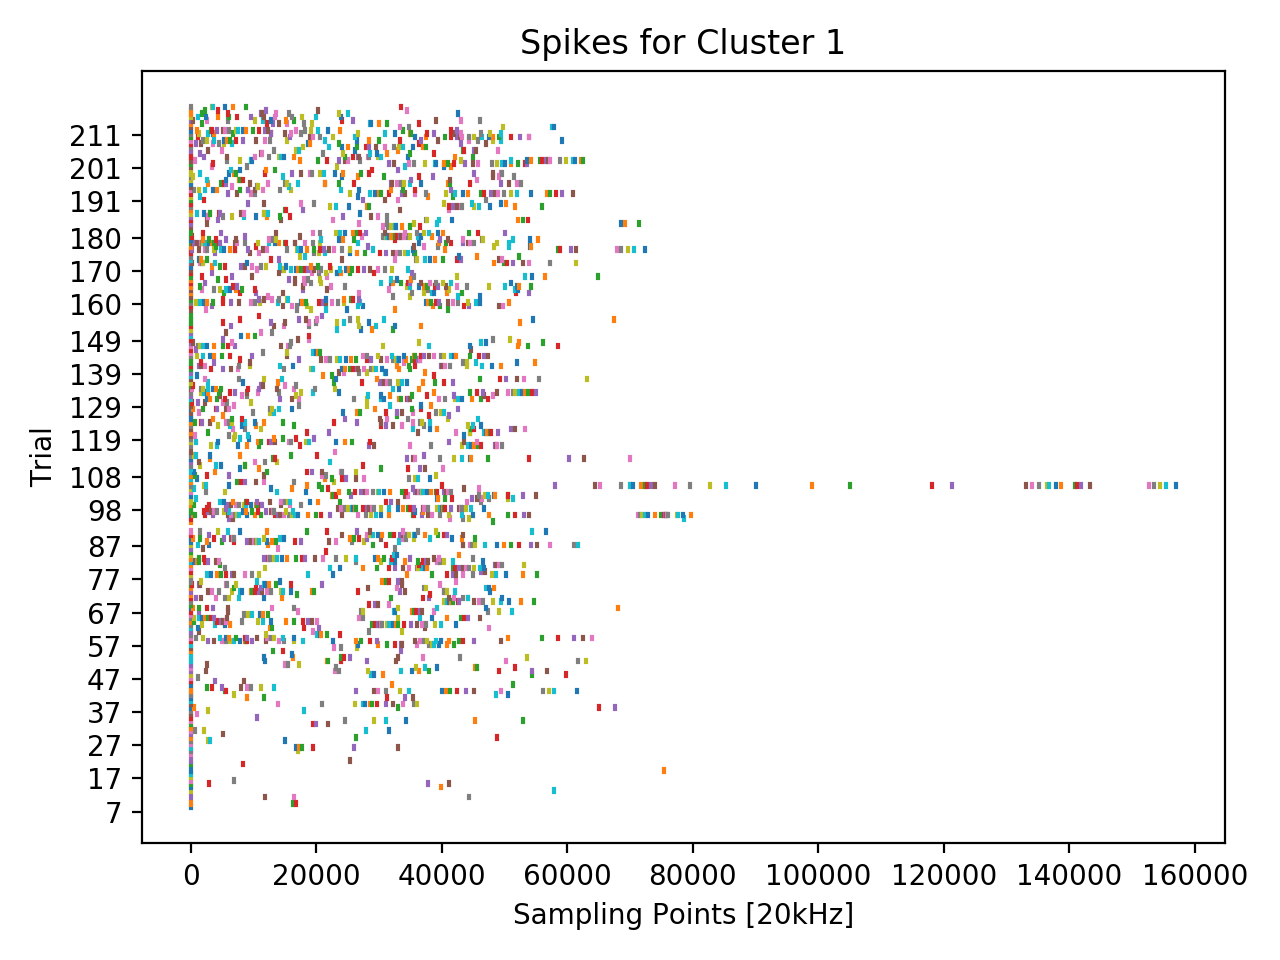

In [81]:
cluster = spike_df[spike_df.loc[:]['cluster'] == 1]['spike_times']
plt_spike_train(cluster, trials_df)

#### spike train 0 = event X

<IPython.core.display.Javascript object>


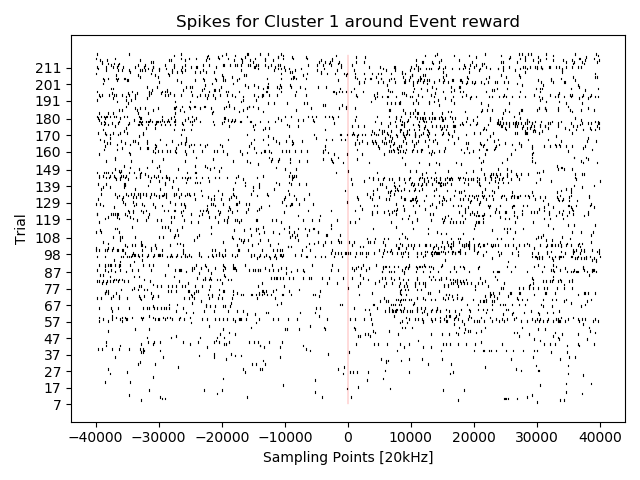

In [24]:
plt_spike_train_event(1, 'reward', 2*20000)


---

<IPython.core.display.Javascript object>


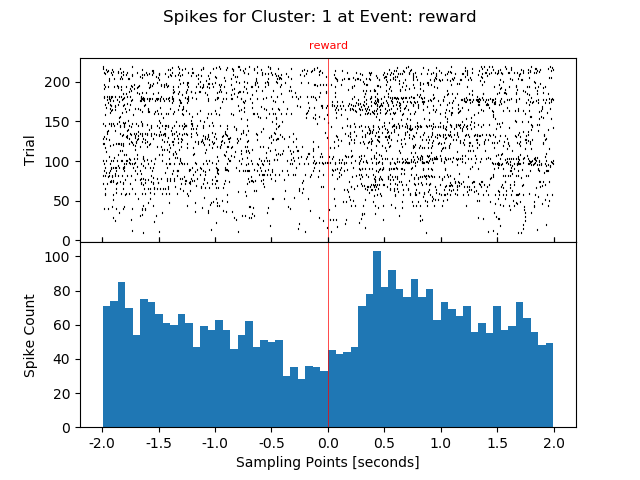

In [162]:
selected_trials = trials_df.loc[trials_df['select'] == True][:]
plt_spike_train_hist_event(1,selected_trials, 'reward', 2)

In [ ]:
# save images of spike train and histogram plot for all good clusters
path = (folder + r"\figures\spikes\spike-train-hist-event\good\reward" )
import os
if not os.path.isdir(path):
    os.makedirs(path) 
    
for cluster in cluster_df.loc[cluster_df['group']=='good'].index:
    plt_spike_train_hist_event(cluster, 'reward', 2, True, path)

In [ ]:
# save images of spike train and histogram plot for all good clusters for all events in trials
# iterate over all trials in trial
for 
path = (folder + r"\figures\spikes\spike-train-hist-event\good\reward_and_noreward" )
import os
if not os.path.isdir(path):
    os.makedirs(path) 
    
for cluster in cluster_df.loc[cluster_df['group']=='good'].index:
    plt_spike_train_hist_event(cluster, 'reward', 2, True, path)

#### spike trains investigate reward types

<IPython.core.display.Javascript object>


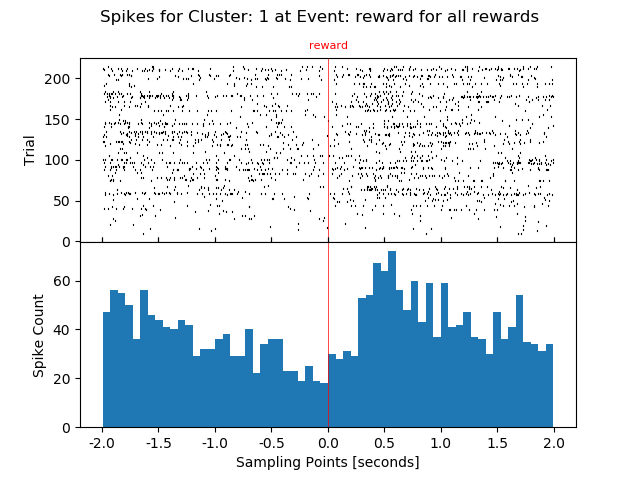

In [169]:
# separate trials into specific events for reward
# reward event = 7 | 5

selected_trials = trials_df.loc[ (trials_df['select'] == True) & ( (trials_df['event']==5) | (trials_df['event']==7) ) ][:]
plt_spike_train_hist_event(1, selected_trials, 'reward', 2, 'all rewards')

<IPython.core.display.Javascript object>


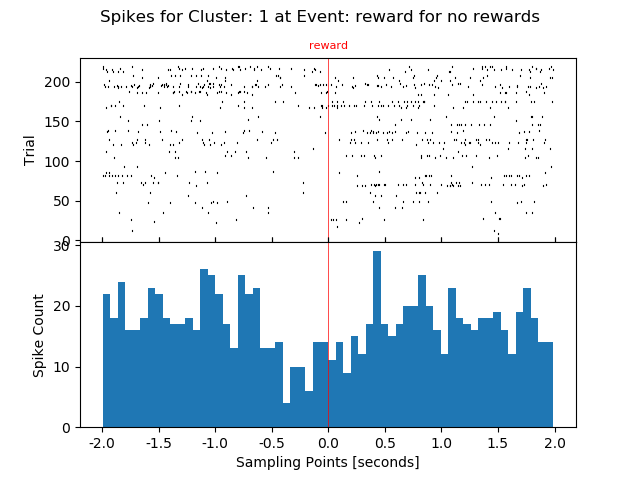

In [170]:
# separate trials into specific events for reward
# no reward event = 8 | 6

selected_trials = trials_df.loc[ (trials_df['select'] == True) & ( (trials_df['event']==8) | (trials_df['event']==6) ) ][:]
plt_spike_train_hist_event(1, selected_trials, 'reward', 2, 'no rewards')semicolon

<IPython.core.display.Javascript object>


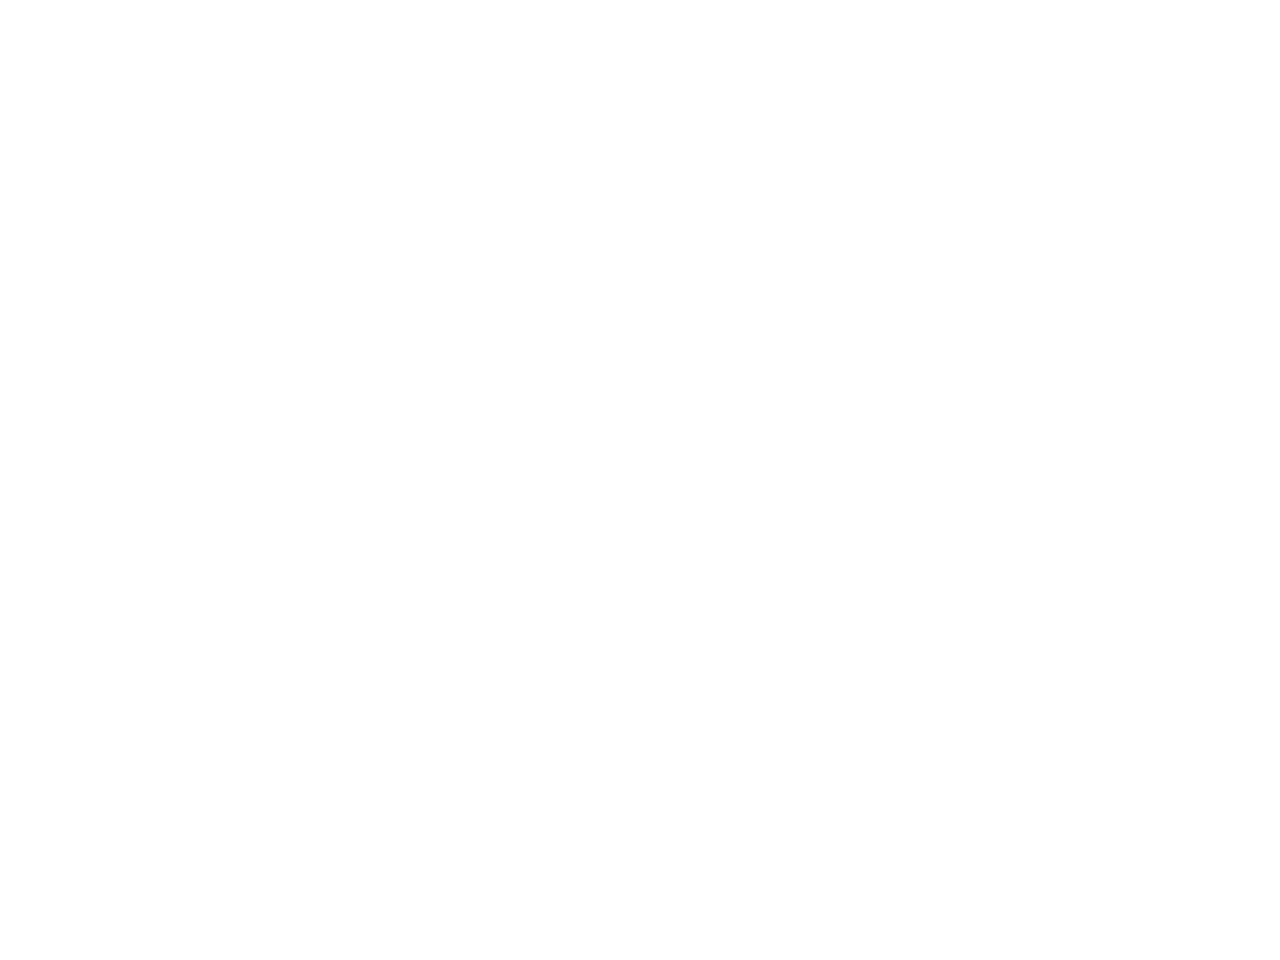

TypeError: boolean value of NA is ambiguous

In [93]:
# modify plot function to plot to axis


def plt_spike_train_hist_event(cluster, selected_trials, event, window, reward_event=None, save=False, path=None):

    cluster_df = spike_df[spike_df.loc[:]['cluster'] == cluster]['spike_times']
    trials = selected_trials[event]
    delta = window*20000

    # initialize data frame for histogram
    hist_df = pd.DataFrame(index=[0])

    # initialize figure
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})

    # loop that iterats trough all indeces in trial df
    for row in trials.index:
        # define length of spike for row
        ypos = [row, row+1]
        # derive spike times in range delta around event time for trial 
        ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
        ar = ar.astype('int64')
        ar = ar - trials[row] 

        #append to historam data frame
        df = pd.DataFrame({row:ar}, dtype="Int64")
        hist_df = pd.concat([hist_df,df], axis=1)

        for col in ar:

    ## plot spike train=========================
            ax1.plot([col, col], ypos, 'k-', linewidth=0.8)

    ## traw red line at event ==============
    ax1.axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # spike train y lable
    ax1.set_ylabel('Trial')

    #labels
    # specify y tick distance
    #ax[0].set_yticks(trials_df.index[trials_df['select'] == True][0::30])
    # trun x labels inside
    ax1.tick_params(axis="x",direction="in")
    # turn of labels on shared x axis only ticks
    plt.setp(ax1.get_xticklabels(), visible=False)
    # write event
    ax1.set_title(event, color='red', fontsize=8)


    ## plot histogram===========================
    # flatten out df
    ar = hist_df.values.flatten()
    num_bins = 60
    # draw histogram
    ax2.hist(ar, bins=num_bins)
    # draw red line at event 
    ####ax2.axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # naming y axis
    ax2.set_ylabel('Spike Count')
    # set x ticks to seconds
    ax2.set_xticklabels(np.arange(-window-0.5,window+0.5,0.5))
    # set ticks top and bottom
    ax2.tick_params(axis='x', bottom=True, top=True)


    # naming
    #ax.set_title('Spikes for Cluster 1')
    if reward_event != None:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event} for {reward_event}")
    else:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
    plt.xlabel('Sampling Points [seconds]')

    # if save = True -> save to path
    if save:
        plt.savefig(path+r"\spike_train_hist_event-"+event+"-"+str(cluster)+".png")
    else:
        return plt.show()

# separate trials into specific events for reward
# no reward event = 8 | 6

selected_trials = trials_df.loc[ (trials_df['select'] == True) & ( (trials_df['event']==8) | (trials_df['event']==6) ) ][:]
#selected_trials['reward'][selected_trials.index[0]]
plt_spike_train_hist_event(1, selected_trials, 'reward', 2, 'no rewards')

<IPython.core.display.Javascript object>


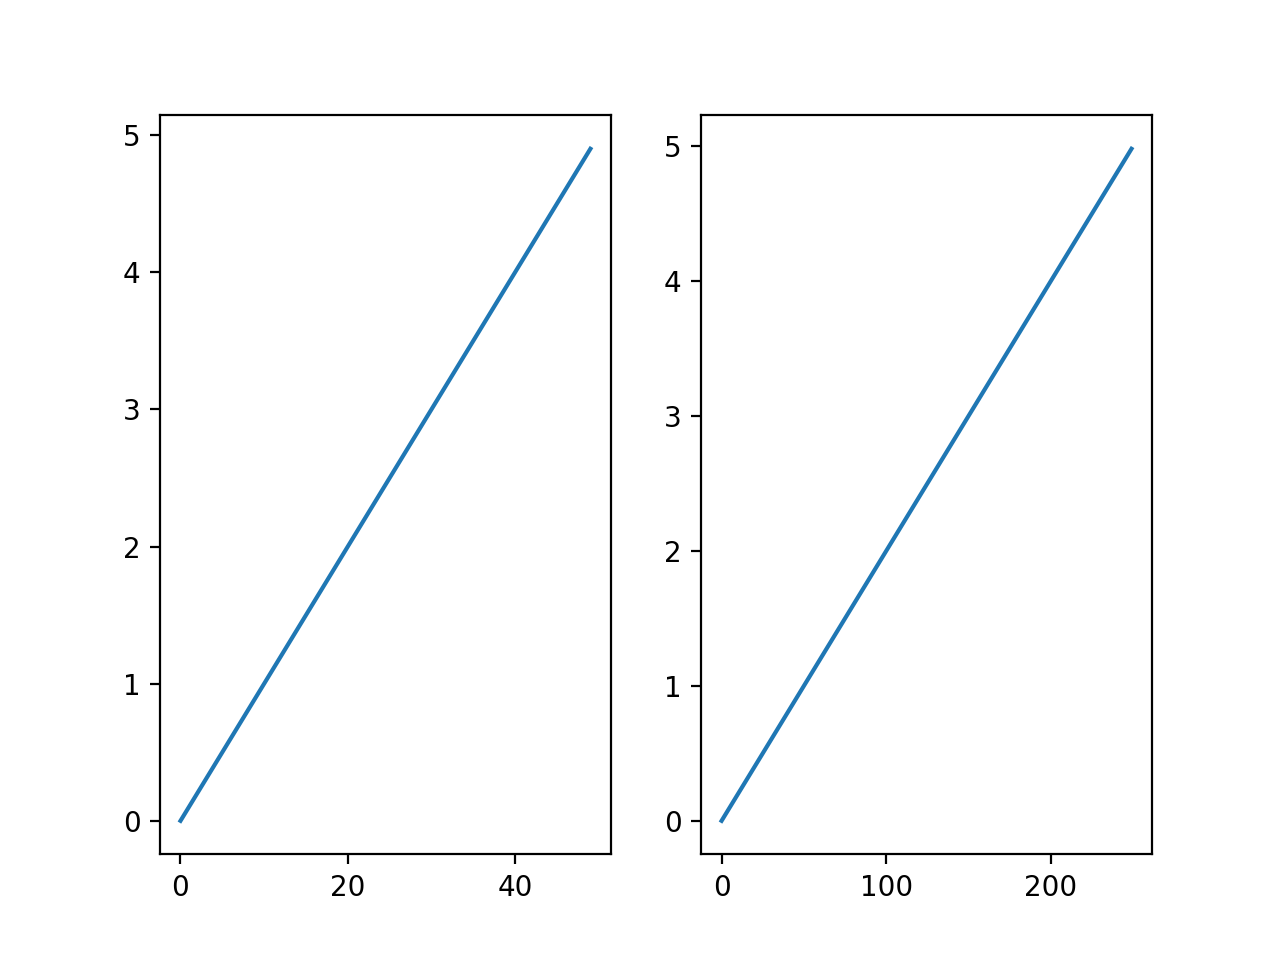

In [83]:
def func1(ax=None):
    ax = ax or plt.gca()
    line = ax.plot (np.arange(0.0, 5.0, 0.1))
    return line

def func2(ax=None):
    ax = ax or plt.gca()
    line = ax.plot (np.arange(0.0, 5.0, 0.02))
    return line


fig, (ax1,ax2) = plt.subplots(ncols=2)
func1(ax1)
func2(ax2)

plt.show()

In [ ]:
# spike tain and hist to plot two to given subplots
def plt_spike_train_hist_event(cluster, selected_trials, event, window, reward_event=None, save=False, path=None):
    cluster_df = spike_df[spike_df.loc[:]['cluster'] == cluster]['spike_times']
    trials = selected_trials[event]
    delta = window*20000

    # initialize data frame for histogram
    hist_df = pd.DataFrame(index=[0])
    
    
        cluster_df = spike_df[spike_df.loc[:]['cluster'] == cluster]['spike_times']
    trials = selected_trials[event]
    delta = window*20000

    # initialize data frame for histogram
    hist_df = pd.DataFrame(index=[0])    cluster_df = spike_df[spike_df.loc[:]['cluster'] == cluster]['spike_times']
    trials = selected_trials[event]
    delta = window*20000

    # initialize data frame for histogram
    hist_df = pd.DataFrame(index=[0])

    # initialize figure
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})

    # loop that iterats trough all indeces in trial df
    for row in trials.index:
        # define length of spike for row
        ypos = [row, row+1]
        # derive spike times in range delta around event time for trial 
        ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
        ar = ar.astype('int64')
        ar = ar - trials[row] 

        #append to historam data frame
        df = pd.DataFrame({row:ar}, dtype="Int64")
        hist_df = pd.concat([hist_df,df], axis=1)

        for col in ar:

    ## plot spike train=========================
            ax1.plot([col, col], ypos, 'k-', linewidth=0.8)

    ## traw red line at event ==============
    ax1.axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # spike train y lable
    ax1.set_ylabel('Trial')

    #labels
    # specify y tick distance
    #ax[0].set_yticks(trials_df.index[trials_df['select'] == True][0::30])
    # trun x labels inside
    ax1.tick_params(axis="x",direction="in")
    # turn of labels on shared x axis only ticks
    plt.setp(ax1.get_xticklabels(), visible=False)
    # write event
    ax1.set_title(event, color='red', fontsize=8)


    ## plot histogram===========================
    # flatten out df
    ar = hist_df.values.flatten()
    num_bins = 60
    # draw histogram
    ax2.hist(ar, bins=num_bins)
    # draw red line at event 
    ####ax2.axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # naming y axis
    ax2.set_ylabel('Spike Count')
    # set x ticks to seconds
    ax2.set_xticklabels(np.arange(-window-0.5,window+0.5,0.5))
    # set ticks top and bottom
    ax2.tick_params(axis='x', bottom=True, top=True)


    # naming
    #ax.set_title('Spikes for Cluster 1')
    if reward_event != None:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event} for {reward_event}")
    else:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
    plt.xlabel('Sampling Points [seconds]')

    # if save = True -> save to path
    if save:
        plt.savefig(path+r"\spike_train_hist_event-"+event+"-"+str(cluster)+".png")
    else:
        return plt.show()

    # initialize figure
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})

    # loop that iterats trough all indeces in trial df
    for row in trials.index:
        # define length of spike for row
        ypos = [row, row+1]
        # derive spike times in range delta around event time for trial 
        ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
        ar = ar.astype('int64')
        ar = ar - trials[row] 

        #append to historam data frame
        df = pd.DataFrame({row:ar}, dtype="Int64")
        hist_df = pd.concat([hist_df,df], axis=1)

        for col in ar:

    ## plot spike train=========================
            ax1.plot([col, col], ypos, 'k-', linewidth=0.8)

    ## traw red line at event ==============
    ax1.axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # spike train y lable
    ax1.set_ylabel('Trial')

    #labels
    # specify y tick distance
    #ax[0].set_yticks(trials_df.index[trials_df['select'] == True][0::30])
    # trun x labels inside
    ax1.tick_params(axis="x",direction="in")
    # turn of labels on shared x axis only ticks
    plt.setp(ax1.get_xticklabels(), visible=False)
    # write event
    ax1.set_title(event, color='red', fontsize=8)


    ## plot histogram===========================
    # flatten out df
    ar = hist_df.values.flatten()
    num_bins = 60
    # draw histogram
    ax2.hist(ar, bins=num_bins)
    # draw red line at event 
    ####ax2.axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
    # naming y axis
    ax2.set_ylabel('Spike Count')
    # set x ticks to seconds
    ax2.set_xticklabels(np.arange(-window-0.5,window+0.5,0.5))
    # set ticks top and bottom
    ax2.tick_params(axis='x', bottom=True, top=True)


    # naming
    #ax.set_title('Spikes for Cluster 1')
    if reward_event != None:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event} for {reward_event}")
    else:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
    plt.xlabel('Sampling Points [seconds]')

    # if save = True -> save to path
    if save:
        plt.savefig(path+r"\spike_train_hist_event-"+event+"-"+str(cluster)+".png")
    else:
        return plt.show()

In [ ]:
def plot_something(data, ax=None, **kwargs):
    ax = ax or plt.gca()
    # Do some cool data transformations...
    return ax.boxplot(data, **kwargs)

fig, (ax1, ax2) = plt.subplots(2)
plot_something(data1, ax1, color='blue')
plot_something(data2, ax2, color='red')

---

<IPython.core.display.Javascript object>


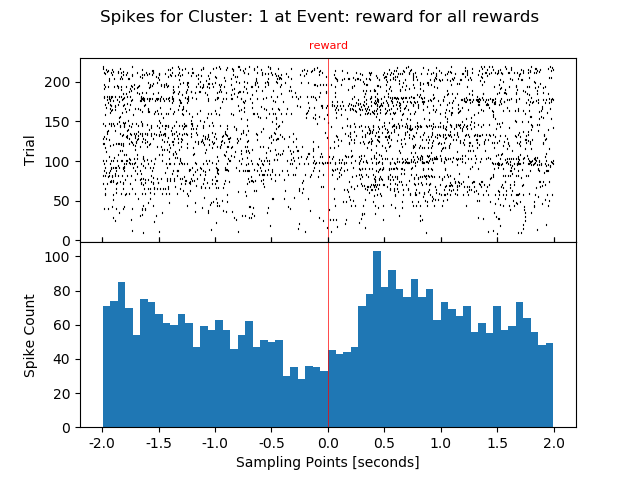

In [163]:
def plt_spike_train_hist_reward_multiple(cluster, plots, window, save=False, path=None):
    """
    def: plot the spike train around event (0) for all trials stacked on each other for event +/- delta
         and the histogram for the count of spikes over all trials
    params: cluster= integer::cluster (aka Neuron) to plot spikes for
            plots=list of touples:: containing:
                selected_trials= DataFrame::dataframe with all the trials to plot         
                event= string::event in question (must be in trials_df as column name)
                reward_event= string::e.g. save reards, or gambl reward
            window = integer::half window width in seconds
            save=Bool::True=save to path
            path=string::path where the picture shall be save to
    return: plot
    """
    cluster_df = spike_df[spike_df.loc[:]['cluster'] == cluster]['spike_times']
    
    trials = selected_trials[event]
    delta = window*20000

    # initialize data frame for histogram
    hist_df = pd.DataFrame(index=[0])

    # initialize figure
    fig, ax = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
    
    ### plotting loop
    for plot in plots:
        # get info
        [selected_trials, event, reward_event=None] = plot



        # loop that iterats trough all indeces in trial df
        for row in trials.index:
            # define length of spike for row
            ypos = [row, row+1]
            # derive spike times in range delta around event time for trial 
            ar = cluster_df[( ( cluster_df >= (trials[row] - delta) ) & ( cluster_df <= (trials[row] + delta) ) )].values
            ar = ar.astype('int64')
            ar = ar - trials[row] 

            #append to historam data frame
            df = pd.DataFrame({row:ar}, dtype="Int64")
            hist_df = pd.concat([hist_df,df], axis=1)

            for col in ar:

        ## plot spike train=========================
                ax[0].plot([col, col], ypos, 'k-', linewidth=0.8)

        ## traw red line at event ==============
        ax[0].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
        # spike train y lable
        ax[0].set_ylabel('Trial')

        #labels
        # specify y tick distance
        #ax[0].set_yticks(trials_df.index[trials_df['select'] == True][0::30])
        # trun x labels inside
        ax[0].tick_params(axis="x",direction="in")
        # turn of labels on shared x axis only ticks
        plt.setp(ax[0].get_xticklabels(), visible=False)
        # write event
        ax[0].set_title(event, color='red', fontsize=8)


        ## plot histogram===========================
        # flatten out df
        ar = hist_df.values.flatten()
        num_bins = 60
        # draw histogram
        ax[1].hist(ar, bins=num_bins)
        # draw red line at event 
        ax[1].axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
        # naming y axis
        ax[1].set_ylabel('Spike Count')
        # set x ticks to seconds
        ax[1].set_xticklabels(np.arange(-window-0.5,window+0.5,0.5))
        # set ticks top and bottom
        ax[1].tick_params(axis='x', bottom=True, top=True)


    # naming
    #ax.set_title('Spikes for Cluster 1')
    if reward_event != None:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event} for {reward_event}")
    else:
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
    plt.xlabel('Sampling Points [seconds]')

    # if save = True -> save to path
    if save:
        plt.savefig(path+r"\spike_train_hist_event-"+event+"-"+str(cluster)+".png")
    else:
        return plt.show()


In [ ]:
plot1 = ()

plots = [plot1, plot2]

for plot in plots:
    [selected_trials, event, reward_event=None] = plot
    print(selected_trials, event, reward_event)